In [64]:
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt
import pandas as pd

## Data

In [50]:
times = pd.read_csv("../files/miplib_20220205_8threads.csv")
times.head()

,Name,CBC,COPT,Gurobi,HiGHS,SCIP
0,30n20b8,145,37,1,1029,70
1,50v-10,7200,525,168,7200,7200
2,academictimetablesmall,7200,3331,355,7200,7200
3,air05,7,5,2,21,24
4,app1-1,3,1,1,17,3


In [51]:
times_long = pd.melt(times, id_vars="Name", var_name="Solver", value_name="Runtime")
times_long.head()

,Name,Solver,Runtime
0,30n20b8,CBC,145
1,50v-10,CBC,7200
2,academictimetablesmall,CBC,7200
3,air05,CBC,7
4,app1-1,CBC,3


In [52]:
times_long["Finished"] = 1 * (times_long["Runtime"] < 7200)
times_long.head()

,Name,Solver,Runtime,Finished
0,30n20b8,CBC,145,1
1,50v-10,CBC,7200,0
2,academictimetablesmall,CBC,7200,0
3,air05,CBC,7,1
4,app1-1,CBC,3,1


In [53]:
solvers = sorted(times_long["Solver"].unique())
solvers

['CBC', 'COPT', 'Gurobi', 'HiGHS', 'SCIP']

In [54]:
bysolver = times_long.set_index(["Solver", "Name"])
bysolver.head()

Runtime  Finished
Solver Name                                     
CBC    30n20b8                     145         1
       50v-10                     7200         0
       academictimetablesmall     7200         0
       air05                         7         1
       app1-1                        3         1

## Kaplan Meier

In [55]:
def kaplan_meier(solver, ax=None):
    kmf = KaplanMeierFitter()
    kmf.fit(
        bysolver.loc[solver]["Runtime"],
        event_observed=bysolver.loc[solver]["Finished"],
        label=solver,
    )
    return kmf.plot_survival_function(ax=ax)

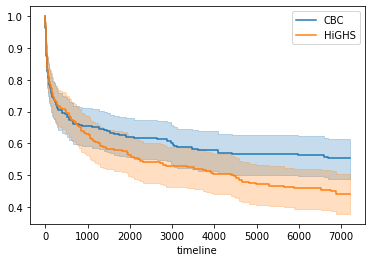

In [60]:
ax = plt.subplot(111)
for s in ["CBC", "HiGHS"]:
    kaplan_meier(s, ax)

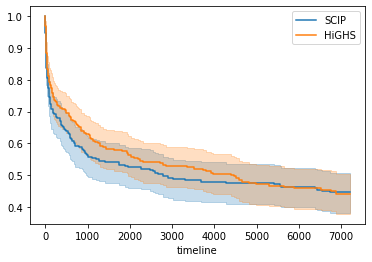

In [61]:
ax = plt.subplot(111)
for s in ["SCIP", "HiGHS"]:
    kaplan_meier(s, ax)

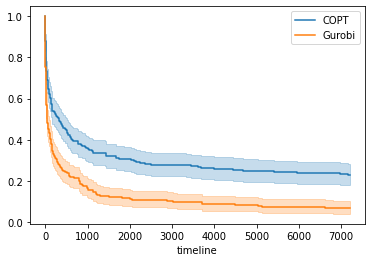

In [63]:
ax = plt.subplot(111)
for s in ["COPT", "Gurobi"]:
    kaplan_meier(s, ax)